In [152]:
import pandas as pd
import numpy as np
import math

UNCLASSIFIED = False
NOISE = -1
global UsedNum

In [153]:
def _dist(x,y):
    # compute and return the euclidean distance
    # put your code here
    new=np.array(x)-np.array(y)
    return((np.array(new[0]))**2+(np.array(new[1]))**2)**(1/2)
print(_dist([0,0],[3,4]))

5.0


In [156]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    if _dist(p,q)<eps:
        return 1;
    else:
        return 0;

In [157]:
def _region_query(m, point_id, eps):
    seeds = []
    n_points = m.shape[1]
    for i in range(n_points):
        if _dist(dataset_1[i],point_id)<eps:
            seeds.append(dataset_1[i])
    seeds=np.array(seeds)
    return seeds

In [5]:
#分群中沒用到
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core

In [158]:
#自訂的函數 用來確認該點是否已被分過群
def AlrUsed(clusterEApoint,classifications):
    global UsedNum
    choice=[]
    for i in range(len(clusterEApoint)):
        if classifications[clusterEApoint[i]]!=False:
            choice.append(classifications[clusterEApoint[i]])
    if choice!=[]:
        choice=np.array(choice)
        UsedNum=np.argmax(np.bincount(choice))
        return True
    return 0
def dbscan(m, eps, min_points,dataset_1):
    cluster_id = -1
    clusterEApoint=[]
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    for j in range(0,n_points):
        for i in range(0,n_points):
            #print(i,_dist(dataset_1[0],dataset_1[i]))
            if _dist(dataset_1[j],dataset_1[i])<eps**2:
                clusterEApoint.append(i)
        #+1是因為會多加一個自己進去
        if len(clusterEApoint)<min_points-1:
            clusterEApoint=[]
        else:
            if AlrUsed(clusterEApoint,classifications):
                for k in range(len(clusterEApoint)):
                    classifications[clusterEApoint[k]]=UsedNum
            else:
                cluster_id+=1
                for k in range(len(clusterEApoint)):
                    classifications[clusterEApoint[k]]=cluster_id
            clusterEApoint=[]
    return classifications

In [128]:
#TESTTTTTTTTTTTTTTTTTTTT
def AlrUsed(clusterEApoint,classifications):
    global UsedNum
    for i in range(len(clusterEApoint)):
        if classifications[clusterEApoint[i]]!=False:
            UsedNum=classifications[clusterEApoint[i]]
            return True
    return 0
cluster_id = -1
clusterEApoint=[]
n_points = m.shape[1]
classifications = [UNCLASSIFIED] * n_points
# the main dbscan algorithm
# put your code here
#print(classifications)
#以第一個當例子 抓出6個和她接近的點
for j in range(0,80):
    for i in range(0,80):
        #print(i,_dist(dataset_1[0],dataset_1[i]))
        if _dist(dataset_1[j],dataset_1[i])<2.56:
            clusterEApoint.append(i)
    #<6是因為會多加一個自己進去
    if len(clusterEApoint)<6:
        clusterEApoint=[]
    else:
        if AlrUsed(clusterEApoint,classifications):
            for k in range(len(clusterEApoint)):
                classifications[clusterEApoint[k]]=UsedNum
        else:
            cluster_id+=1
            for k in range(len(clusterEApoint)):
                classifications[clusterEApoint[k]]=cluster_id
        clusterEApoint=[]
#print(classifications)

In [159]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()


In [160]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points,dataset_1)

In [138]:
##########測試 省略即可
%matplotlib inline
import dbscan_lab_helper as helper
from sklearn import cluster
epsilon=2

# Cluster
dbscan = cluster.DBSCAN(eps=epsilon)
clustering_labels_2 = dbscan.fit_predict(dataset_1)
#print(clustering_labels_2)
# Plot
#helper.plot_clustered_dataset(dataset_1, clustering_labels_2, neighborhood=True, epsilon=epsilon)

[2 1 2 2 2 1 2 1 2 2 1 2 2 2 3 3 3 1 3 3 2 3 3 1 2 1 1 1 1 1 1 1 1 2 1 3 2
 1 3 3 3 1 1 2 2 1 1 2 1 3 3 3 3 3 1 1 3 1 3 2 2 1 2 2 1 3 2 3 3 3 3 2 2 1
 2 2 1 3 1 2]


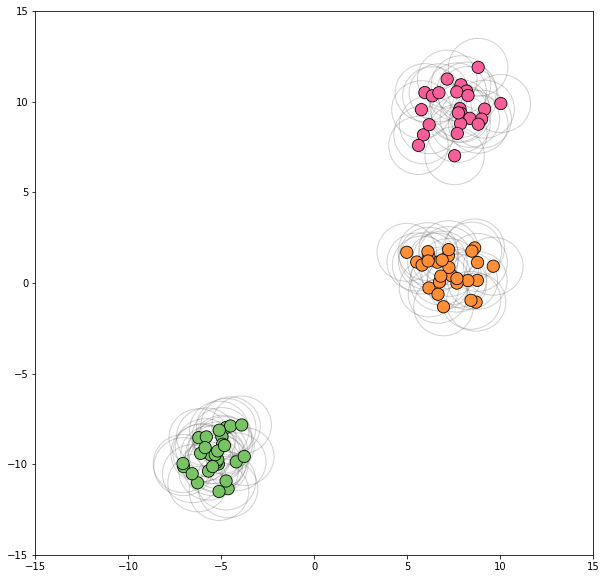

In [161]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
print(result)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [162]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [163]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points,dataset_2)

[1 1 2 2 1 2 2 5 5 2 1 5 5 5 5 5 1 1 1 5 5 5 1 1 1 1 1 5 2 1 2 1 1 1 5 5 5
 1 2 5 2 2 1 1 5 5 1 1 5 5 2 1 2 5 1 5 1 1 5 5 5 5 2 5 5 5 5 2 1 2 5 2 2 1
 5 5 5 5 2 5 5 2 5 2 2 2 1 1 5 2 5 2 5 1 2 1 2 2 1 5 1 2 2 1 5 1 2 1 5 1 5
 1 1 1 2 5 2 2 5 5 2 5 1 1 2 1 2 2 1 2 2 5 1 5 5 5 2 2 1 2 2 2 5 0 2 1 1 1
 2 2 1 5 2 2 2 2 2 1 2 2 2 2 1 5 2 2 2 2 5 2 5 5 5 2 5 2 5 2 1 4 5 5 1 2 2
 5 2 1 1 2 1 1 1 2 1 1 5 2 5 2 1 2 5 2 1 1 2 5 1 5 1 5 5 5 1 1 2 5 5 1 1 1
 5 5 2 2 2 5 2 1 1 1 2 2 5 1 1 5 2 1 2 2 2 1 2 5 5 2 2 5 2 5 5 2 1 2 2 5 1
 5 5 1 5 2 2 5 2 1 5 5 5 1 5 5 2 1 1 1 1 2 2 1 2 1 5 5 1 5 5 1 2 1 2 1 5 2
 2 5 5 2]


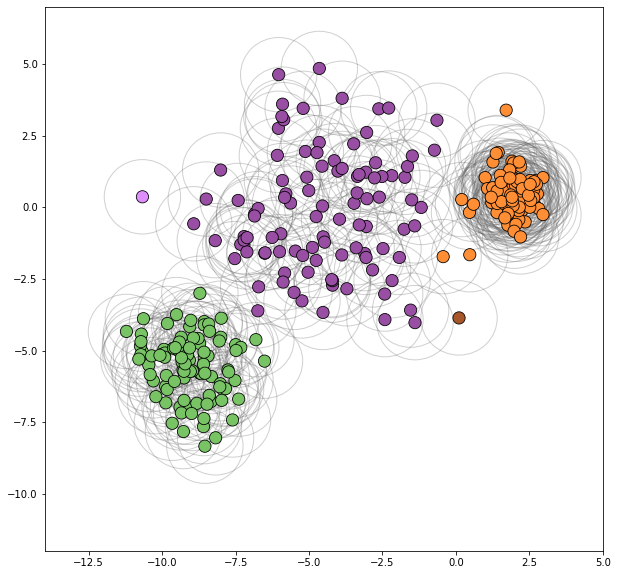

In [164]:
result = np.asarray(a)
print(result)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)
